In [3]:
import netCDF4 as nc
import matplotlib.pyplot as plt

# Open the NetCDF file
file_path = './dotnc/tmmx.nc'  # Update with your NetCDF file path
dataset = nc.Dataset(file_path)
dataset.variables.keys() 
# Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]
t_max = dataset.variables['air_temperature'][:]  # Adjust according to your file
t_max_celsius = t_max - 273.15

# Select a specific time step (for example, the first time step)
# Assuming the dimensions are (time, latitude, longitude)
# Change the index [0] to whatever time step you want to visualize
tmax_slice = t_max[0, :, :]  # Select the first time step
dataset.variables.keys()
# dataset['day'].values()


dict_keys(['lon', 'lat', 'day', 'crs', 'air_temperature'])

Latitudes shape: (585,)
Longitudes shape: (1386,)
Temperature slice shape: (585, 1386)


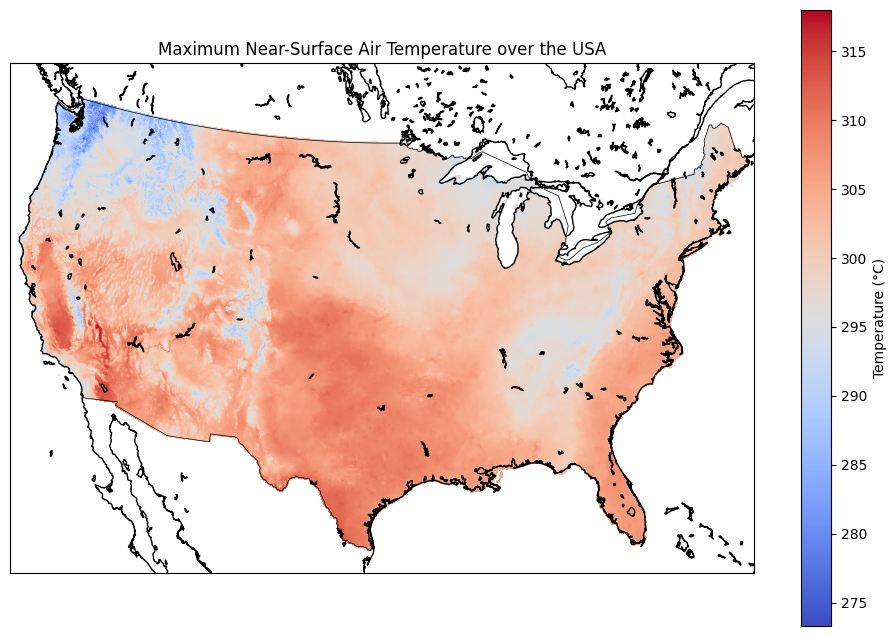

In [31]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Open the NetCDF file
file_path = './dotnc/tmmx.nc'  # Update with your NetCDF file path
dataset = nc.Dataset(file_path)

# Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]
# req_thing = 'precipitation_amount'

req_thing = 'air_temperature'
t_max = dataset.variables[req_thing][:]  # Adjust according to your file

# Select a specific time step (for example, the first time step)
t_max_slice= t_max[91, :, :]  # Select the first time step

# Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
print('Latitudes shape:', latitudes.shape)
print('Longitudes shape:', longitudes.shape)
print('Temperature slice shape:', t_max_slice.shape)

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Create a Basemap instance
plt.figure(figsize=(12, 8))
m = Basemap(projection='lcc', resolution='i',
            lat_0=37.5, lon_0=-96,
            llcrnrlon=-119, urcrnrlon=-64,
            llcrnrlat=22, urcrnrlat=50)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Convert lat/lon to map projection coordinates
dx = np.diff(longitudes)[0]/2.0
dy = np.diff(latitudes)[0]/2.0
lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
    
    # Convert lat/lon to map projection coordinates
lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
x, y = m(lon_grid, lat_grid)
# Create color map using pcolormesh
mesh = m.pcolormesh(x, y, t_max_slice, cmap='coolwarm', shading='flat')


# Add colorbar
plt.colorbar(mesh, label='Temperature (°C)')

# Add title
plt.title('Maximum Near-Surface Air Temperature over the USA')

# Show the plot
plt.show()

# Close the dataset
dataset.close()

AttributeError: 'FigureCanvasAgg' object has no attribute 'renderer'

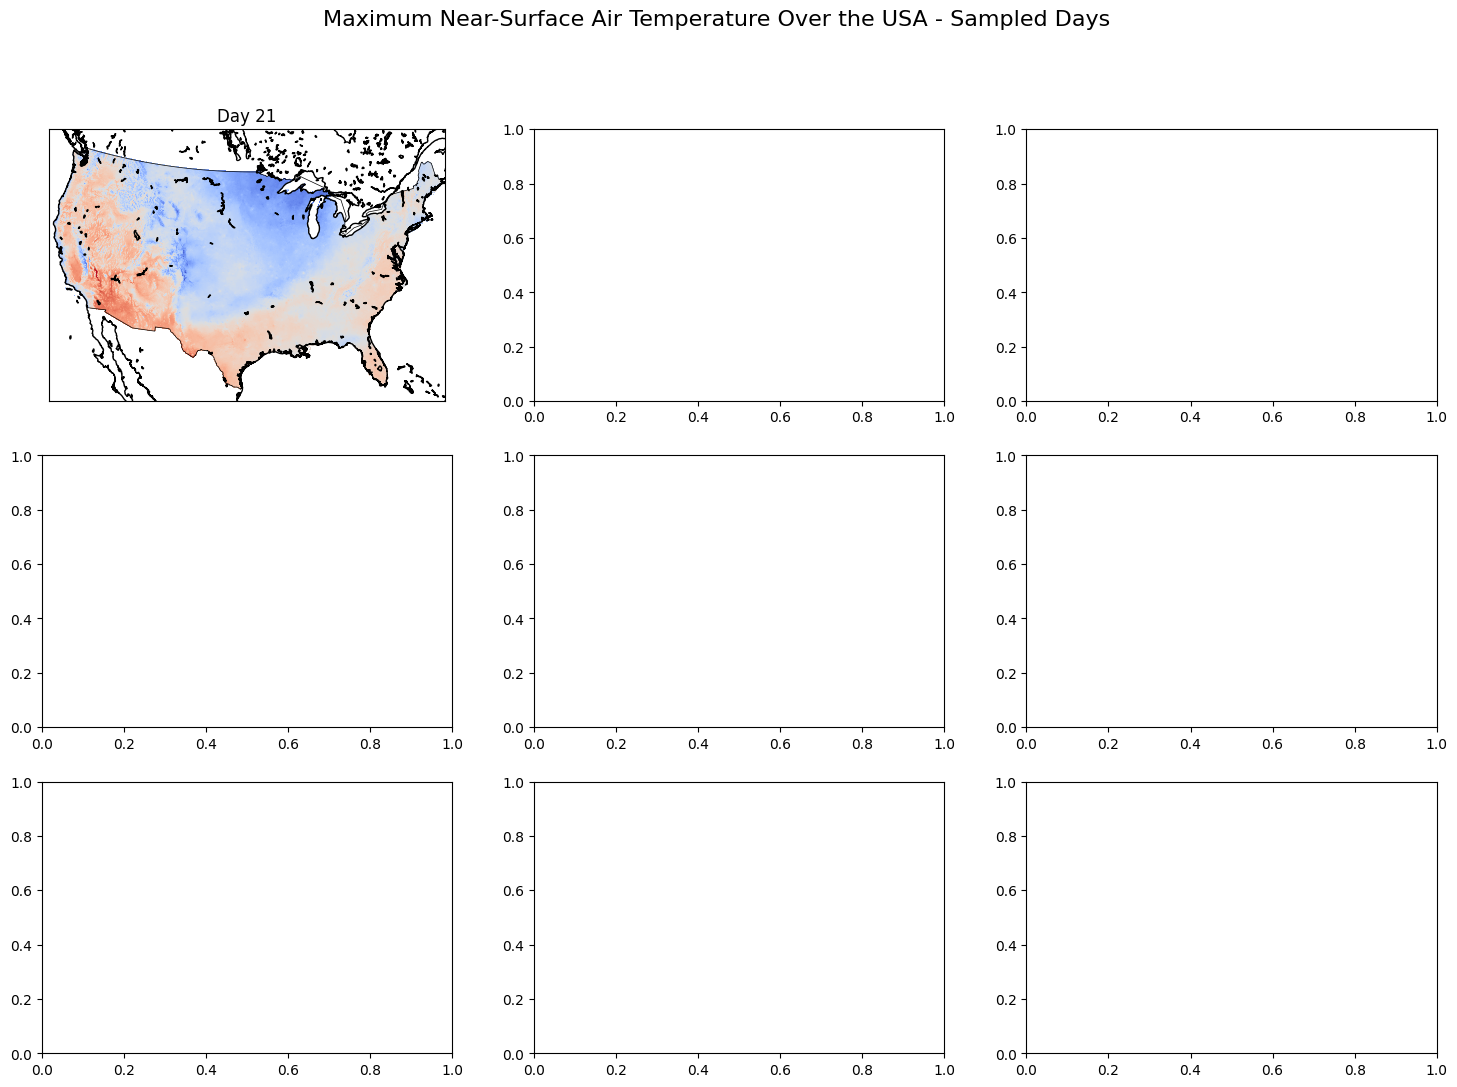

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Assuming `t_max_slices` is a 3D array with shape (90, lat, lon)
num_samples = 9  # Number of days you want to sample
sample_indices = [20,24,26,28,30,32,34,36,38]  # Uniformly spaced indices

fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # 3x3 grid for 9 samples
fig.suptitle('Maximum Near-Surface Air Temperature Over the USA - Sampled Days', fontsize=16)

for i, day in enumerate(sample_indices):
    ax = axes[i // 3, i % 3]  # Determine row and column for each day’s subplot

    # Create Basemap instance for each subplot
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50, ax=ax)
    
    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()
    
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
    
    # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh for each sampled day's temperature slice
    mesh = m.pcolormesh(x, y, t_max_celsius[day, :, :], cmap='coolwarm', shading='auto')
    
    # Add a title for each subplot
    ax.set_title(f'Day {day + 1}', fontsize=12)
    
# Adjust layout to prevent overlap and add a color bar
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
cbar = fig.colorbar(mesh, ax=axes.ravel().tolist(), label='Temperature (Celsius)', orientation='vertical')
plt.show()

